<a href="https://colab.research.google.com/github/storwood/Fastai-course/blob/master/Lesson_1/Lesson1_dog_cats_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [5]:
path = untar_data(URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/dogscats/valid'),
 PosixPath('/root/.fastai/data/dogscats/train'),
 PosixPath('/root/.fastai/data/dogscats/test1'),
 PosixPath('/root/.fastai/data/dogscats/sample')]

In [7]:
!ls /root/.fastai/data/dogscats

sample	test1  train  valid


In [9]:
!ls /root/.fastai/data/dogscats/train

cats  dogs


In [0]:
doc(ImageDataBunch.from_folder)

In [0]:
data = ImageDataBunch.from_folder(path,
                                 ds_tfms=get_transforms(),
                                 size=224,
                                 bs=bs).normalize(imagenet_stats)

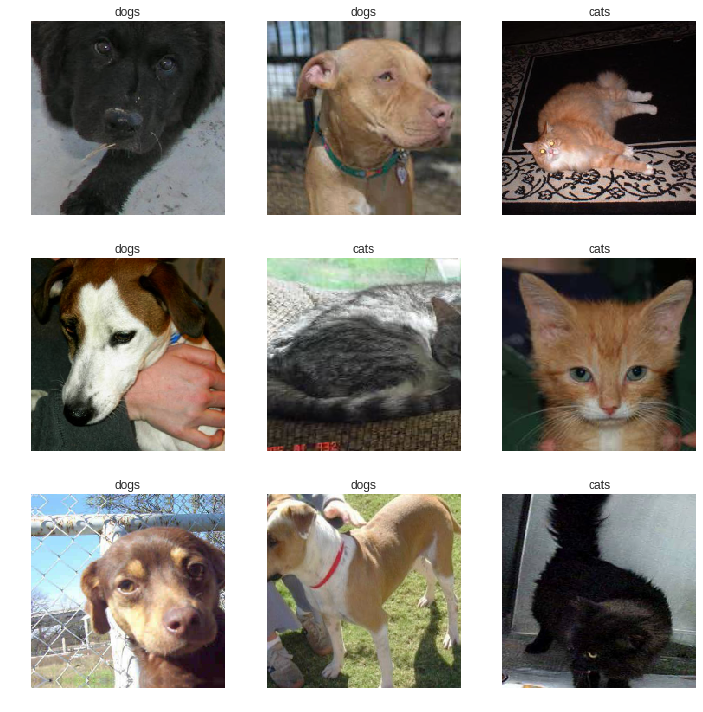

In [26]:
data.show_batch(rows=3, figsize=(10,10))

In [22]:
print(data.classes)

['cats', 'dogs']


In [23]:
print(data.c)

2


In [0]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [28]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


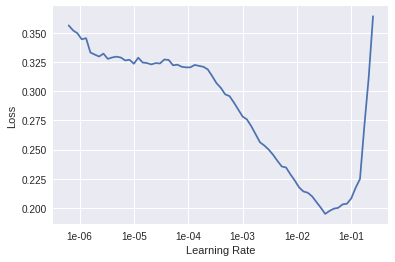

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2,max_lr=slice(2e-4,3e-2))

epoch,train_loss,valid_loss,error_rate
1,0.083242,0.027391,0.008000
2,0.042073,0.022107,0.010500


In [0]:
learn.save("stage1-resnet34")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,index = interp.top_losses()

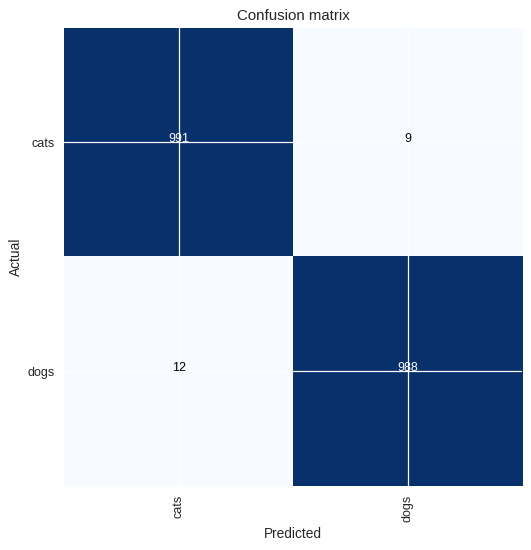

In [43]:
interp.plot_confusion_matrix(figsize=(6,6),dpi=90)

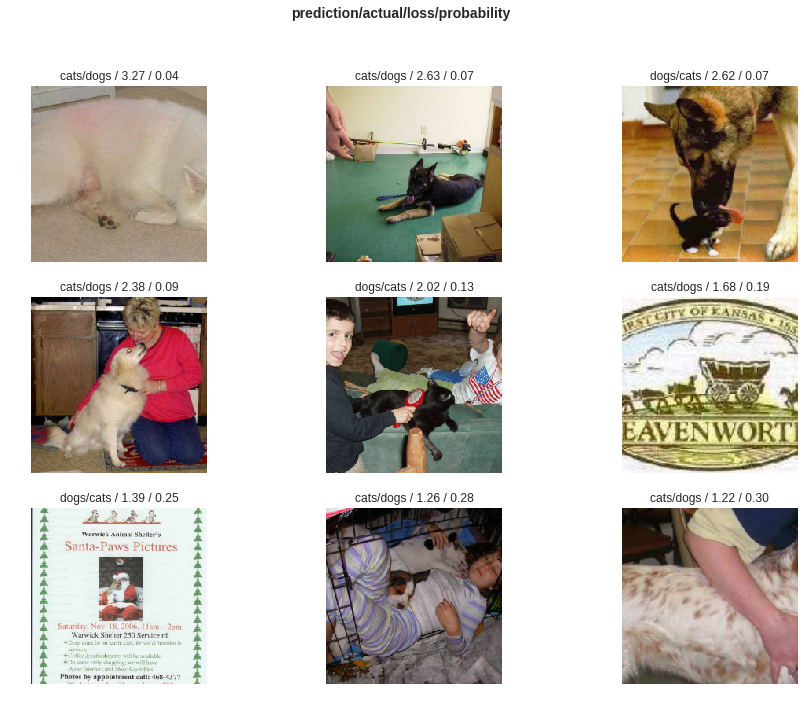

In [46]:
interp.plot_top_losses(9, figsize=(15,11))